## Import libs and data

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import sklearn.metrics as sm
##eneables intelli sense in notebooks Use TAB to see options.
%config IPCompleter.greedy=True

#Set the display to show 40 columns
pd.options.display.max_columns = 40

readData = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(readData)

In [2]:
df = df.drop(['id','date'], axis=1)
#df = df[df.bedrooms < 30]

In [3]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


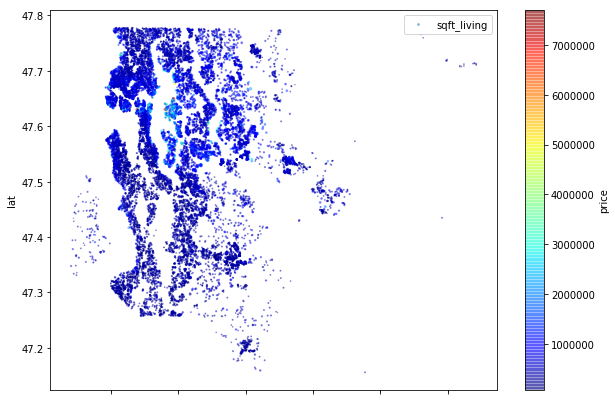

In [4]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.4,
        s=df["sqft_living"]/2000, label="sqft_living", figsize=(10,7),
        c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [5]:
corr_matrix = df.corr()
initial_corr_matrix = corr_matrix["price"].sort_values(ascending=False)

## PCA of longitude and latitude into one feature

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
coordinates = df[["lat","long"]]
principalCoordinateList = pca.fit_transform(coordinates)
df_principal_coord = pd.DataFrame(principalCoordinateList, columns=["latlong_pca"])
df = pd.concat([df, df_principal_coord], axis = 1)
df.drop(["lat","long"], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,latlong_pca
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,0.000189
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,-0.185444
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,-0.132340
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,-0.107901
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,0.088654


In [7]:
#df_coord.drop(["lat","long"], axis=1, inplace=True)
#df = df_coord

In [8]:
sqft_living_pr_bedroom = df.sqft_living/df.bedrooms
bathrooms_pr_floor = df.bathrooms/df.floors
df_new_feat = pd.concat([df, sqft_living_pr_bedroom, bathrooms_pr_floor ], axis=1)
#df = df_new_feat
df_new_feat.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,latlong_pca,0,1
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,0.000189,393.333333,1.000
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,-0.185444,856.666667,1.125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,-0.132340,385.000000,1.000
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,-0.107901,490.000000,3.000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,0.088654,560.000000,2.000


In [9]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
zipcode         -0.053203
latlong_pca     -0.174306
Name: price, dtype: float64

## Descriptive statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
latlong_pca      21613 non-null float64
dtypes: float64(4), int64(14)
memory usage: 3.0 MB


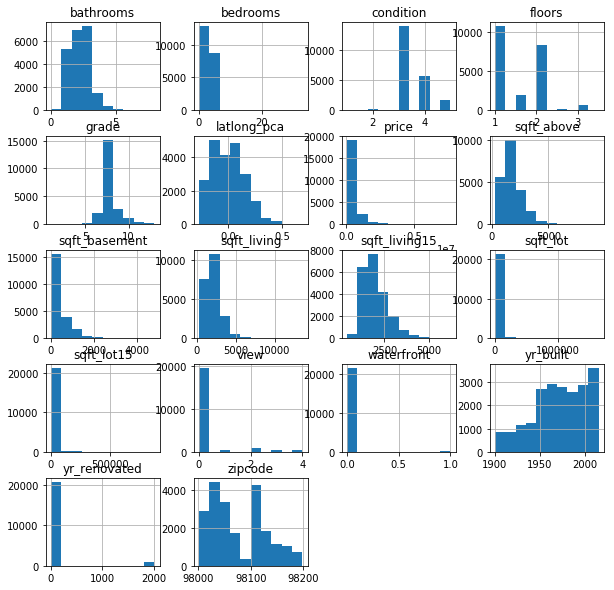

In [11]:
df.hist(figsize=(10,10))
plt.show()

In [12]:
df_start = df
##df.drop(["id","zipcode","lat","long"], axis=1, inplace=True)
df.head(0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,latlong_pca


In [13]:
#The median in the 'price' label
df['price'].median()

450000.0

In [14]:
#The standard deviation of the 'price' label
df['price'].std(ddof=0)

367118.7031813722

In [15]:
#The standard error of the mean of the 'price' label
df['price'].sem(ddof=0)

2497.1750311768974

In [16]:
#The median in the 'price' label
df['price'].mean()


540088.1417665294

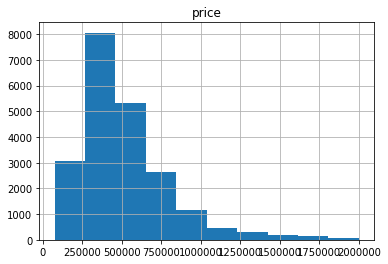

In [17]:
df_price_cut = df[df.price < 2000000]
hist = df_price_cut.hist('price')
plt.show()

In [18]:
print("full dataset: ", df.shape, " price cut at 2.000.000: ", df_price_cut.shape)

full dataset:  (21613, 18)  price cut at 2.000.000:  (21408, 18)


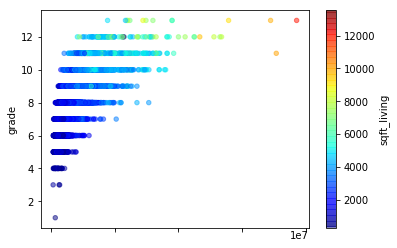

In [19]:
plot = df.plot.scatter(x='price', y='grade', alpha=0.5, c='sqft_living', cmap=plt.get_cmap("jet"))

## Scaling

In [20]:
from sklearn import preprocessing
df_noPrice = df.drop(["price"], axis=1)
# Get column names first
names = df_noPrice.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_noPrice)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df = pd.concat([scaled_df, df.price], axis = 1)
scaled_df.head()

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,latlong_pca,price
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.943355,-0.260715,0.001269,221900.0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,-0.432686,-0.187868,-1.245222,538000.0
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.070140,-0.172375,-0.888639,180000.0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.914174,-0.284522,-0.724539,604000.0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,-0.272190,-0.192849,0.595298,510000.0


In [21]:
scaled_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,latlong_pca,price
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,1.482989e-15,1.853096e-15,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,4.348961e-15,-8.953095e-14,-1.506632e-16,1.235382e-16,7.834693e-17,5.400881e+05
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,3.671272e+05
min,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-1.438025e+00,-2.316325e+00,-4.438052e-01,-1.850627e+00,7.500000e+04
25%,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-8.399369e-01,-7.244971e-01,-2.808593e-01,-8.179883e-01,3.219500e+05
50%,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,-2.418484e-01,-2.138280e-01,-1.885636e-01,-8.027666e-02,4.500000e+05
75%,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,7.487357e-01,5.448802e-01,-9.835556e-02,6.692576e-01,6.450000e+05
max,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,2.262647e+00,6.162239e+00,3.144029e+01,4.653466e+00,7.700000e+06


In [22]:
df_before_train_split = scaled_df

In [23]:
df_before_train_split.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,latlong_pca,price
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.943355,-0.260715,0.001269,221900.0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,-0.432686,-0.187868,-1.245222,538000.0
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.070140,-0.172375,-0.888639,180000.0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.914174,-0.284522,-0.724539,604000.0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,-0.272190,-0.192849,0.595298,510000.0


## Split train and test set

In [24]:
train_set, test_set = train_test_split(df_before_train_split, test_size=0.2, random_state=42)

In [25]:
X_train = train_set.drop("price", axis=1)
Y_train = train_set["price"].copy()

X_test = test_set.drop("price", axis=1)
Y_test = test_set["price"].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148896B16D8>,
      dtype=object)

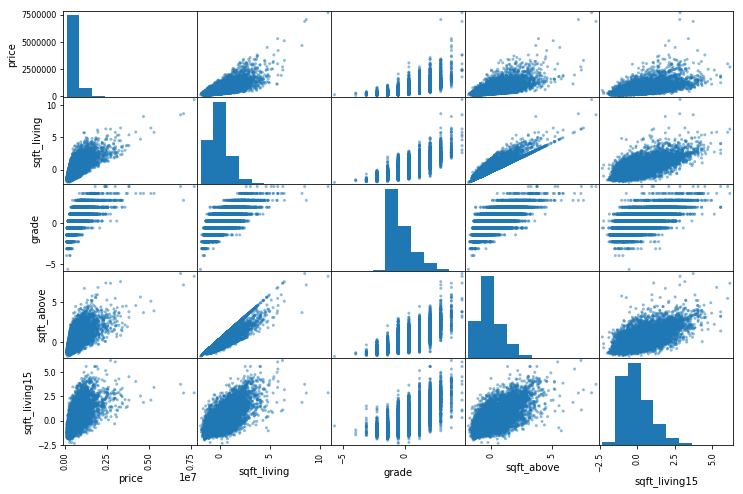

In [26]:
attributes = ["price", "sqft_living", "grade", "sqft_above", "sqft_living15"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

## Machine Learning - Neural Network and others

In [27]:
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [28]:
#Random forest grid search / 
param_grid = {'n_estimators': [105, 110, 115], 'max_features': [5,6,7], 'bootstrap': [True,False]}
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=105, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [29]:
#Neural network grid search
param_grid = {'hidden_layer_sizes': [(10,10)], 'max_iter': [500, 1000], 'learning_rate_init': [0.01, 0.001, 0.0005]}
mlp_reg = MLPRegressor()
grid_search = GridSearchCV(mlp_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
grid_search.best_estimator_

C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
#Gradient Boosting grid search
param_grid = {'n_estimators': [250, 500, 700], 'learning_rate': [0.5, 0.25, 0.1, 0.05]}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=700, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
regressor_names = [
    "Random Forest", 
    "Neural Net (10,10) max_iter=500",
    "Neural Net (10,10) max_iter=1000",
    #"Gradient Boosting 250, 0.25",
    "Gradient Boosting 500, 0.1",
    #"Gradient Boosting 700, 0.1"
]

In [32]:
regressors = [
    RandomForestRegressor(n_estimators=110, bootstrap=False, max_features=7),
    MLPRegressor(hidden_layer_sizes=(10,10),max_iter =500, learning_rate_init = 0.01),
    MLPRegressor(hidden_layer_sizes=(10,10),max_iter = 1000, learning_rate_init = 0.01),
    #GradientBoostingRegressor(n_estimators=250, learning_rate=0.25),
    GradientBoostingRegressor(n_estimators=500, learning_rate=0.1),
    #GradientBoostingRegressor(n_estimators=700, learning_rate=0.1),
]

In [33]:
for reg, reg_name in zip(regressors, regressor_names):
    print(f"** {reg_name}")
    t0 = time()
    reg.fit(X_train, Y_train)
    t1 = time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = reg.score(X_train[0:10000], Y_train[0:10000])
    t2 = time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = reg.score(X_test, Y_test)
    t3 = time()
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
     
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tR2 Score Train: {score_train:.3f}\tR2 Score Test: {score_test:.3f}")
    print(f"\tMean absolute error:\t", round(sm.mean_absolute_error(Y_test, y_test_pred), 2))
    print(f"\tRMSE:\t", round(np.sqrt(sm.mean_squared_error(Y_test, y_test_pred)), 2)) 
    print(f"\tMedian absolute error:\t", round(sm.median_absolute_error(Y_test, y_test_pred), 2)) 
    print(f"\tExplain variance score:\t", round(sm.explained_variance_score(Y_test, y_test_pred), 2))
    print(f"\tR2 train score:\t", round(sm.r2_score(Y_train, y_train_pred), 2))
    print(f"\tR2 test score:\t", round(sm.r2_score(Y_test, y_test_pred), 2))

** Random Forest
	Training time:		17.121
	Prediction time(train):	0.505
	Prediction time(test):	0.226
	R2 Score Train: 0.999	R2 Score Test: 0.822
	Mean absolute error:	 82727.79
	RMSE:	 163849.45
	Median absolute error:	 45510.44
	Explain variance score:	 0.82
	R2 train score:	 1.0
	R2 test score:	 0.82
** Neural Net (10,10) max_iter=500


C:\Users\simon\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


	Training time:		29.485
	Prediction time(train):	0.016
	Prediction time(test):	0.000
	R2 Score Train: 0.810	R2 Score Test: 0.797
	Mean absolute error:	 111843.61
	RMSE:	 175264.07
	Median absolute error:	 78124.43
	Explain variance score:	 0.8
	R2 train score:	 0.8
	R2 test score:	 0.8
** Neural Net (10,10) max_iter=1000
	Training time:		47.329
	Prediction time(train):	0.000
	Prediction time(test):	0.016
	R2 Score Train: 0.818	R2 Score Test: 0.798
	Mean absolute error:	 110644.44
	RMSE:	 174804.8
	Median absolute error:	 77875.99
	Explain variance score:	 0.8
	R2 train score:	 0.81
	R2 test score:	 0.8
** Gradient Boosting 500, 0.1
	Training time:		7.857
	Prediction time(train):	0.125
	Prediction time(test):	0.047
	R2 Score Train: 0.934	R2 Score Test: 0.863
	Mean absolute error:	 78684.79
	RMSE:	 144045.13
	Median absolute error:	 48242.75
	Explain variance score:	 0.86
	R2 train score:	 0.93
	R2 test score:	 0.86


In [34]:
df_before_train_split.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,latlong_pca,price
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.943355,-0.260715,0.001269,221900.0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,-0.432686,-0.187868,-1.245222,538000.0
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.070140,-0.172375,-0.888639,180000.0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.914174,-0.284522,-0.724539,604000.0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,-0.272190,-0.192849,0.595298,510000.0


In [35]:
feature_importances = pd.DataFrame(RandomForestRegressor(n_estimators=100).fit(X_train,Y_train).feature_importances_,
                                   index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)



In [36]:
feature_importances


,importance
grade,0.361301
sqft_living,0.242288
latlong_pca,0.110175
yr_built,0.053496
zipcode,0.051765
sqft_living15,0.045634
waterfront,0.024043
sqft_lot15,0.021341
sqft_above,0.021144
bathrooms,0.017285
